<a href="https://colab.research.google.com/github/aasthagarg128/ML_Learn/blob/main/Movie_Recommendation_System_using_Machine_Learding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

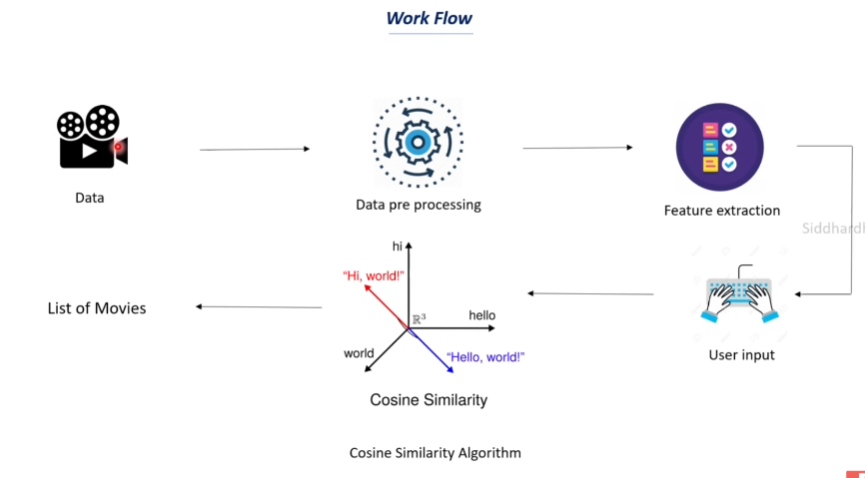

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and Pre-Processing

In [ ]:
# loading the data from csv file into DataFrame
movie_data=pd.read_csv('/content/movies.csv')

In [ ]:
# printing the first 5 rows of the data
movie_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
# printing the last 5 rows of the data
movie_data.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia
4802,4802,0,Documentary,NaN,25975,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger


In [ ]:
# checking for the no. of rows and columns
movie_data.shape

(4803, 24)

In [ ]:
# checking the missing values
movie_data.isnull().sum()

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


In [ ]:
# selecting the relevant features for recommendation

selected_features=['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
# replacing the null values with null string

for feature in selected_features:
  movie_data[feature]=movie_data[feature].fillna('')  # filling the null spaces with empty string

In [ ]:
# combining all the 5 selected features
combined_features=movie_data['genres']+movie_data['keywords']+movie_data['tagline']+movie_data['cast']+movie_data['director']

In [ ]:
print(combined_features)

0       Action Adventure Fantasy Science Fictioncultur...
1       Adventure Fantasy Actionocean drug abuse exoti...
2       Action Adventure Crimespy based on novel secre...
3       Action Crime Drama Thrillerdc comics crime fig...
4       Action Adventure Science Fictionbased on novel...
                              ...                        
4798    Action Crime Thrillerunited states\u2013mexico...
4799    Comedy RomanceA newlywed couple's honeymoon is...
4800    Comedy Drama Romance TV Moviedate love at firs...
4801    A New Yorker in ShanghaiDaniel Henney Eliza Co...
4802    Documentaryobsession camcorder crush dream gir...
Length: 4803, dtype: object


In [ ]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors=vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 111820 stored elements and shape (4803, 27580)>
  Coords	Values
  (0, 245)	0.07858581760804864
  (0, 444)	0.09109355212252296
  (0, 8936)	0.11806131645084655
  (0, 21836)	0.09966592997173947
  (0, 9304)	0.27385789694599244
  (0, 4456)	0.2179967521551067
  (0, 10193)	0.1653243242081299
  (0, 22916)	0.3366875640692919
  (0, 26334)	0.130597230719163
  (0, 4676)	0.24529097704249617
  (0, 22778)	0.27385789694599244
  (0, 24197)	0.07518543993419267
  (0, 27161)	0.12619886579371511
  (0, 18164)	0.08690831799482268
  (0, 18558)	0.26121683351048536
  (0, 21521)	0.15623566659433683
  (0, 27182)	0.23480088356130557
  (0, 27540)	0.19771357974524179
  (0, 21487)	0.21550128478931552
  (0, 22464)	0.2020708956871175
  (0, 26547)	0.19638671147741735
  (0, 23267)	0.16128139780622522
  (0, 14550)	0.22368093636480682
  (0, 16614)	0.1569607387745327
  (0, 20729)	0.27385789694599244
  :	:
  (4801, 18790)	0.22450140828104795
  (4801, 11776)	0.3005

Cosine Similarity

In [ ]:
#gettingthe similarityscoreusing cosine similarity

similarity= cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.06865296 0.01492221 ... 0.         0.         0.        ]
 [0.06865296 1.         0.02799128 ... 0.01243107 0.         0.        ]
 [0.01492221 0.02799128 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.01243107 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
similarity.shape

(4803, 4803)

In [ ]:
# getting the movie name from the user

movie_name=input('Enter your favourite movie name: ')

Enter your favourite movie name: Captain America


In [ ]:
# creating a list with all the movies name given in the dataset

list_of_all_movies_title=movie_data['title'].tolist()
print(list_of_all_movies_title)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# finding the close matches for the movie name taken from user

find_close_match=difflib.get_close_matches(movie_name,list_of_all_movies_title)
print(find_close_match)

['Captain America: Civil War', 'Mi America', 'Captain America: The First Avenger']


In [ ]:
close_match=find_close_match[0]
print(close_match)

Captain America: Civil War


In [ ]:
# finding the index of the movie based on the title

index_of_the_movie=movie_data[movie_data.title==close_match]['index'].values[0]
print(index_of_the_movie)

26


In [ ]:
# gettinng the list of similar movies

similarity_score=list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, np.float64(0.06262210806872326)), (1, np.float64(0.015527097278541506)), (2, np.float64(0.05018422394259799)), (3, np.float64(0.00724209638489856)), (4, np.float64(0.02559673721111285)), (5, np.float64(0.006789842515798787)), (6, np.float64(0.009142172391422655)), (7, np.float64(0.2862091047395238)), (8, np.float64(0.009366955720519364)), (9, np.float64(0.04939224018196049)), (10, np.float64(0.06851934775752344)), (11, np.float64(0.01437468755617043)), (12, np.float64(0.009058825235241796)), (13, np.float64(0.015006949577462441)), (14, np.float64(0.06058880377835436)), (15, np.float64(0.008602040414943042)), (16, np.float64(0.27072517284276515)), (17, np.float64(0.015241940231903828)), (18, np.float64(0.0167740515886753)), (19, np.float64(0.013586304824446022)), (20, np.float64(0.08626829227235047)), (21, np.float64(0.005903920509555296)), (22, np.float64(0.008498412827983637)), (23, np.float64(0.007662345718460371)), (24, np.float64(0.008339876045462009)), (25, np.float64(0.0)), 

In [ ]:
#index_iron_man = movie_data[movie_data.title == 'Iron Man 2']['index'].values[0]
#index_user_movie = movie_data[movie_data.title == movie_name]['index'].values[0]

#similarity_score_particular_movie = similarity[index_iron_man][index_user_movie]

#print(similarity_score_particular_movie)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
len(similarity_score)


4803

In [ ]:
# sorting the movie based on their similarity score

sorted_similar_movies=sorted(similarity_score, key=lambda x:x[1], reverse=True)
print(sorted_similar_movies)

[(26, np.float64(1.0000000000000002)), (85, np.float64(0.39188791915678944)), (7, np.float64(0.2862091047395238)), (16, np.float64(0.27072517284276515)), (79, np.float64(0.2662261136150401)), (169, np.float64(0.18441288144416987)), (31, np.float64(0.1818617876802796)), (68, np.float64(0.1603230693292908)), (38, np.float64(0.15945945032607572)), (47, np.float64(0.1435413663801731)), (1187, np.float64(0.14315758364364708)), (511, np.float64(0.1399638586026265)), (33, np.float64(0.135287332396088)), (782, np.float64(0.1265940923007727)), (46, np.float64(0.12546583899946803)), (2857, np.float64(0.12490594795901641)), (203, np.float64(0.12178511915740667)), (64, np.float64(0.11837325312850451)), (788, np.float64(0.11467988221198921)), (954, np.float64(0.11245033505278651)), (2445, np.float64(0.11196847244508792)), (174, np.float64(0.109262524359436)), (129, np.float64(0.10922345247397242)), (628, np.float64(0.10749257083647326)), (3815, np.float64(0.1072759185662382)), (271, np.float64(0.10

In [ ]:
# printing the names for similar movies based on index
print('Movies suggested for you: ')

i=1

for movies in sorted_similar_movies:
  index=movies[0]
  title_from_index=movie_data[movie_data.index==index]['title'].values[0]

  if(i<=30):
    print(i,".",title_from_index)
    i+=1

Movies suggested for you: 
1 . Captain America: Civil War
2 . Captain America: The Winter Soldier
3 . Avengers: Age of Ultron
4 . The Avengers
5 . Iron Man 2
6 . Captain America: The First Avenger
7 . Iron Man 3
8 . Iron Man
9 . The Amazing Spider-Man 2
10 . Star Trek Into Darkness
11 . Bridge of Spies
12 . X-Men
13 . X-Men: The Last Stand
14 . The Spirit
15 . X-Men: Days of Future Past
16 . Rachel Getting Married
17 . X2
18 . X-Men: Apocalypse
19 . Deadpool
20 . The Judge
21 . The Apparition
22 . The Incredible Hulk
23 . Thor
24 . Saving Private Ryan
25 . Major Dundee
26 . The Island
27 . Platoon
28 . Zodiac
29 . Lucky You
30 . Fury


Movie Recommendation System

In [ ]:
# getting the movie name from the user
movie_name=input('Enter your favourite movie name: ')

# creating a list with all the movies name given in the dataset
list_of_all_movies_title=movie_data['title'].tolist()

# finding the close matches for the movie name taken from user
find_close_match=difflib.get_close_matches(movie_name,list_of_all_movies_title)

close_match=find_close_match[0]


# finding the index of the movie based on the title
index_of_the_movie=movie_data[movie_data.title==close_match]['index'].values[0]

# gettinng the list of similar movies
similarity_score=list(enumerate(similarity[index_of_the_movie]))


sorted_similar_movies=sorted(similarity_score, key=lambda x:x[1], reverse=True)

print('Movies suggested for you: ')

i=1

for movies in sorted_similar_movies:
  index=movies[0]
  title_from_index=movie_data[movie_data.index==index]['title'].values[0]

  if(i<=30):
    print(i,".",title_from_index)
    i+=1


Enter your favourite movie name: Avatar
Movies suggested for you: 
1 . Avatar
2 . Alien
3 . Guardians of the Galaxy
4 . Moonraker
5 . Space Dogs
6 . Alien³
7 . Aliens
8 . Clash of the Titans
9 . The Right Stuff
10 . Star Trek Beyond
11 . The Astronaut's Wife
12 . Galaxy Quest
13 . Wing Commander
14 . Star Trek Into Darkness
15 . Terminator Salvation
16 . Cargo
17 . Planet of the Apes
18 . Imaginary Heroes
19 . Shadow Conspiracy
20 . The Book of Life
21 . Sunshine
22 . Pocahontas
23 . Out of the Furnace
24 . Snow White: A Tale of Terror
25 . Cedar Rapids
26 . The Iron Giant
27 . Treasure Planet
28 . Star Wars: Clone Wars: Volume 1
29 . Star Trek
30 . Men in Black II
